# 1.1 Birth Rates

The data on US births, provided by the CDC is in `data/births.csv`.

Reproduce the following plot of births by gender over time given the data:

![](births_gender.png)

Note the `1e6` on the y axis for scale

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from  math import cos, pi
import seaborn as sns
import pandas as pd         
from pandas_datareader import data
import datetime as dt
import gzip 
import seaborn as sns
import json

%matplotlib inline

In [2]:
df = pd.read_csv('data/births.csv')


In [37]:
def plot_births(df):
    table = df.pivot_table(index='year',
                           columns='gender',
                           values='births',
                           aggfunc=np.sum)
    table.plot(title="Total births by gender over years", 
                color=['b', 'darkorange'],
                ylabel='Total Births per year'
    )


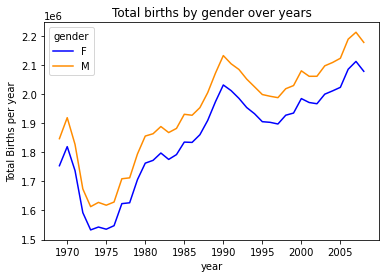

In [4]:
plot_births(df)

<AxesSubplot:xlabel='year'>

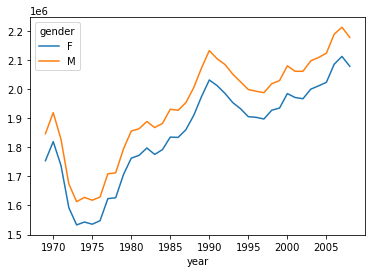

In [5]:
df.groupby(['year','gender']).births.sum().unstack().plot()

# 1.2 Births anomalies

This was analyzed by beloved statistician Andrew Gelman [here](http://andrewgelman.com/2012/06/14/cool-ass-signal-processing-using-gaussian-processes/), leading to this plot:

![](births_gp100.png)

Explain all three plots in Gelman's figure. 

**1.2:** What is the periodic component? What is the residual? Use your research skills to learn then explain it (in english).

# 1.3 Holiday Anomalies Plot

Reproduce *as best you can* the first of the 3 figures from Andrew Gelman's blog post (your plot may have small differences)

**1.3.1:** Reproduce the births line in a plot. Hint: Make the x axis a `pd.datetime` object

**1.3.2:** Reproduce the `smoothed` line. Hint: use a rolling window average

**1.3.3:** Reproduce the entire figure with the mean line as a horizontal. You can make the y axis total births instead of a % deviation from mean axis (they'll look the same anyway)

In [2]:
df = pd.read_csv('data/births.csv')


In [3]:
#clean useless data
df = df.dropna()
df = df.drop(df.index[df.day > 31])
df = df.drop(df.index[df.month.isin([4,6,9,11]) & df.day > 30])
df = df.drop(df.index[df.month.isin([1]) & df.day > 28])

In [4]:

df['n'] = df.births / df.births.mean() * 100
df['avg'] = 100

In [5]:
 df['date'] = pd.to_datetime(df[['year','month','day']],errors='coerce')
 df['dday'] = df.date.dt.dayofyear

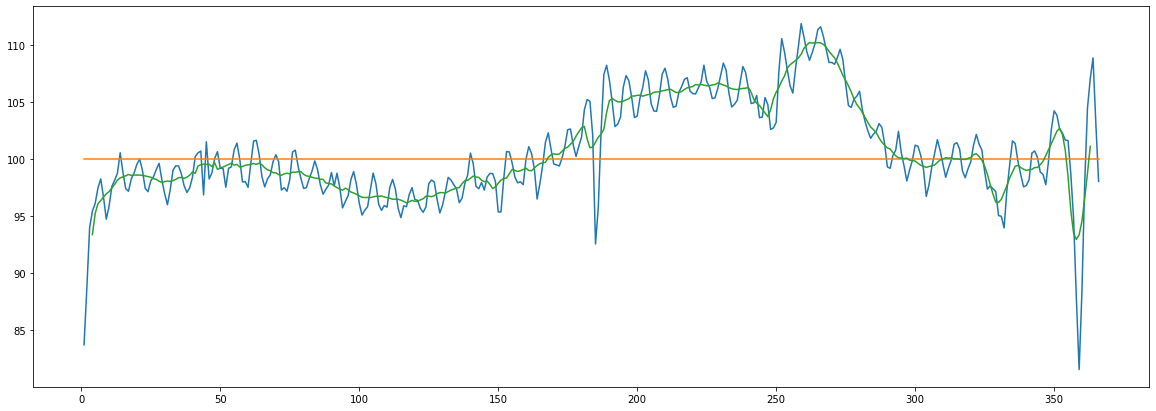

In [6]:
fig, ax = plt.subplots(figsize=(20, 7))

ax.plot(df.groupby(["dday"]).agg({'n':'mean'}))
ax.plot(df.groupby(["dday"]).agg({'avg':'mean'}))
ax.plot((df.groupby(["dday"]).agg({'n':'mean'})).rolling(7, center=True).mean()) # got help from J

In [7]:
#df = df.groupby(['date']).sum()
#smoothed = gaussian_filter1d(df.births, sigma=10)
#rolling = df.rolling(7,center=True)

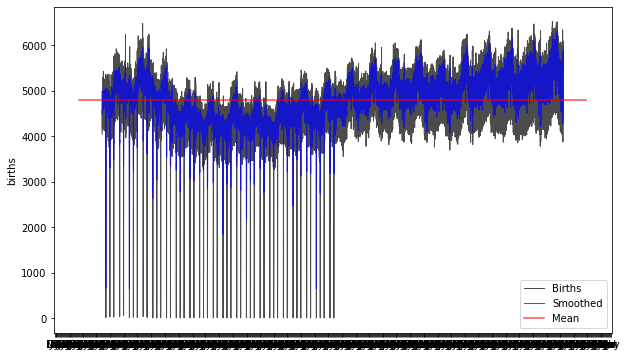

In [12]:
#fig, ax = plt.subplots(figsize=(10, 6))
#ax.plot(df.index,df.births,lw=1,alpha=0.7)

# ax.hlines(y=df.births.mean(), xmin = df.index.min(), xmax= df.index.max(), label='Mean', colors='r')
# plt.plot(df.index, df.births, lw=1, label='Births', color='black')
# #plt.plot(df.index, ysmoothed, label='Smoothed', color='b')

# ax.legend()
# plt.show()

In [97]:

#df.day = df.day.fillna(1)
#df.day = df.day.replace(99,1)
#df.loc['month']=
# df['date'] = pd.to_datetime(df[['year','month','day']],errors='coerce')
#df
#rolling = df.rolling(window=10).mean()
#rolling = df.rolling(7,center=True)
#custom = df.groupby(['month', 'day']).agg({'births': ['mean']}).reset_index()
#custom

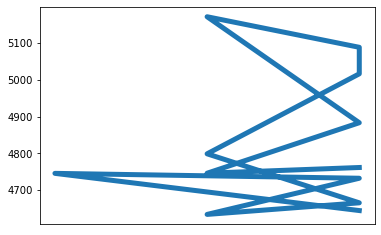

In [104]:
#fig, ax = plt.subplots(1,1) #(figsize=(14,10))#
##ax.plot_date(pd.to_datetime(df['month']),df['births'],sum(),alpha=0.25,lw=0)

#ax.plot(pd.to_datetime(df.groupby('month')['day'].max()), df.groupby('month')['births'].mean(), '-', lw = 5)
##ax.plot(df.groupby('month')['month'].max(), df.groupby('month')['births'].mean(), '-', lw = 5)

##axes.plot(custom.,custom.birth)
##custom.columnsQW

# 2. Recipe Database

### 2.1 

Load the JSON recipe database we saw in lecture 4.

How many of the recipes are for breakfast food? Hint: The `description` would contain the work "breakfast"

In [ ]:
with gzip.open('data/recipe.json.gz','r') as f:
    data = (line.strip().decode() for line in f)
    data_json = f"[{','.join(data)}]"
recipes = pd.read_json(data_json)

In [28]:
recipes = pd.read_json('data/recipe.json', lines=True)

In [29]:

recipes.description.str.lower().str.contains("breakfast").sum() 


3524

### 2.2 A simple recipe recommender

Let's build a recipe recommender: given a list of basic ingredients, find a recipe that uses all those ingredients.

Here is the list of ingredients that can be asked for:

```
['salt', 'pepper', 'oregano', 'sage', 'parsley',
 'rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']
```

**Hint:** Build a new column for each of the ingredients that indicates whether that ingredient is in the recipe.

**example:**
```
recommend_ingredients(["parsley", "paprika", "tarragon"], df)

result: 
# The rows where these 3 ingredients are in the recipe
[2069, 74964, 93768, 113926, 137686, 140530, 158475, 158486, 163175, 165243]
```

In [81]:
def recommend_ingredients(ing, df):
    all_ing = ['salt', 'pepper', 'oregano', 'sage', 'parsley',
 'rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']
    for I in all_ing:
        recipes[I] = recipes.ingredients.str.lower().str.contains(I)
    df=recipes    
    for ing in ing: 
         df = df.loc[df[ing] == True]
    return df.index

In [82]:
recommend_ingredients(["parsley", "paprika", "tarragon"], recipes)

Int64Index([  2069,  74964,  93768, 113926, 137686, 140530, 158475, 158486,
            162896, 163175, 165243, 171774],
           dtype='int64')

# 3. Movies!

Recall the [Movies Dataset](https://www.kaggle.com/rounakbanik/the-movies-dataset) from lecture 4. It's made up of several tables which we've played with in lecture 4.

The tables have common columns (`id` and `movie_id`) around which you can merge and join tables.

### 3.1 best director

Your task is to find **The best director** in terms of average ratings of his movies. This can be from the `ratings` or `ratings_small` table, or simply the vote average in the `metadata` table. The director can be found in the `cast` table.

You will have to use all of your skills to get this done, between using groupbys and merging multiple tables together

In [128]:
credits = pd.read_csv('data/credits.csv')
metadata = pd.read_csv('data/movies_metadata.csv')

In [129]:
df = pd.DataFrame()
credits['director'] = credits['crew'].str.extract("'Director', 'name': '(.*?)\',")

In [130]:

#credits.id?
#metadata.id?
credits.id =credits.id.astype(str)
metadata.id = metadata.id.astype(str)

df = pd.merge(credits, metadata, on='id')


In [131]:
avg = df.groupby(["director"]).agg({'vote_average':'mean'})

In [132]:
avg = avg.sort_values('vote_average',ascending=False,)

In [141]:
avg.reset_index()
avg.head(20)

#avg = avg.loc['vote_average' == 10]

vote_average
director                          
Steven Lewis Simpson          10.0
Nissim Dayan                  10.0
Duncan McLachlan              10.0
Jane Howell                   10.0
Christopher Fraser            10.0
Mehul Kumar                   10.0
Helena Solberg                10.0
Bruno Irizarry                10.0
Holly L. De Ruyter            10.0
Antonis Sotiropoulos          10.0
Sierra Pettengill             10.0
Tal Goldberg                  10.0
Juris Poškus                  10.0
Joe Thomas                    10.0
Kevin Romeo                   10.0
Dan Hartley                   10.0
Kentaro Hagiwara              10.0
Kostas Haralambous            10.0
Omar Regan                    10.0
Patricio Henríquez            10.0

In [139]:
avg

vote_average
director                           
Steven Lewis Simpson           10.0
Nissim Dayan                   10.0
Duncan McLachlan               10.0
Jane Howell                    10.0
Christopher Fraser             10.0
...                             ...
Mark A. Reyes                   0.0
Victor Duncan                   0.0
Mark Altman                     0.0
Julien Fezans                   0.0
Lawrence Gordon Clark           NaN

[17487 rows x 1 columns]

In [67]:
#data_transposed = zip(credits.crew[0])
#credits.crew[0]('credit_id','department','gender','id','job','name','profile_path')

In [99]:
#metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [72]:
# data_transposed
# df = pd.DataFrame(data_transposed, columns=['credit_id']#,'department','gender','id','job','name','profile_path'])
# df

SyntaxError: invalid syntax (<ipython-input-72-e0d6e93651b2>, line 3)

In [64]:
#pat = r'(?P<price>\d*\.\d*)\s*x\s*(?P<size>\d*)\s*\((?P<num_orders>\d*)\)$'
#pat = r'((.*?)\',')
# credits[['credit_id','department','gender','id','job','name','profile_path']] = credits.crew.str.extract(""'(.*?)\',", expand=True)#4945
#test = credits.crew.to_numpy


In [75]:
#cast = credits.crew.str.extract()



In [83]:
#ll = list(credits.director.unique())

In [92]:
#len(ll)

17488